In [11]:
import pandas as pd
import numpy as np

dataset= pd.read_csv('SuperStore_Orders.csv', sep=',', encoding='ISO-8859-1')
dataset

df = pd.DataFrame(dataset)
df

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,01-01-2011,06-01-2011,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408,2,0.0,106.1400,35.46,Medium,2011
1,IN-2011-47883,01-01-2011,08-01-2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120,3,0.1,36.0360,9.72,Medium,2011
2,HU-2011-1220,01-01-2011,05-01-2011,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66,4,0.0,29.6400,8.17,High,2011
3,IT-2011-3647632,01-01-2011,05-01-2011,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",45,3,0.5,-26.0550,4.82,High,2011
4,IN-2011-47883,01-01-2011,08-01-2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",114,5,0.1,37.7700,4.70,Medium,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,CA-2014-115427,31-12-2014,04-01-2015,Standard Class,Erica Bern,Corporate,California,United States,US,West,...,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",14,2,0.2,4.5188,0.89,Medium,2014
51286,MO-2014-2560,31-12-2014,05-01-2015,Standard Class,Liz Preis,Consumer,Souss-Massa-Draâ,Morocco,Africa,Africa,...,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",4,1,0.0,0.4200,0.49,Medium,2014
51287,MX-2014-110527,31-12-2014,02-01-2015,Second Class,Charlotte Melton,Consumer,Managua,Nicaragua,LATAM,Central,...,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26,3,0.0,12.3600,0.35,Medium,2014
51288,MX-2014-114783,31-12-2014,06-01-2015,Standard Class,Tamara Dahlen,Consumer,Chihuahua,Mexico,LATAM,North,...,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7,1,0.0,0.5600,0.20,Medium,2014


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   order_id        51290 non-null  object 
 1   order_date      51290 non-null  object 
 2   ship_date       51290 non-null  object 
 3   ship_mode       51290 non-null  object 
 4   customer_name   51290 non-null  object 
 5   segment         51290 non-null  object 
 6   state           51290 non-null  object 
 7   country         51290 non-null  object 
 8   market          51290 non-null  object 
 9   region          51290 non-null  object 
 10  product_id      51290 non-null  object 
 11  category        51290 non-null  object 
 12  sub_category    51290 non-null  object 
 13  product_name    51290 non-null  object 
 14  sales           51290 non-null  object 
 15  quantity        51290 non-null  int64  
 16  discount        51290 non-null  float64
 17  profit          51290 non-null 

In [13]:
# Mengganti koma dengan titik dalam kolom 'sales'
df['sales'] = df['sales'].str.replace(',', '.', regex=False)
df['sales'] = df['sales'].astype(float)
print(df.dtypes)

order_id           object
order_date         object
ship_date          object
ship_mode          object
customer_name      object
segment            object
state              object
country            object
market             object
region             object
product_id         object
category           object
sub_category       object
product_name       object
sales             float64
quantity            int64
discount          float64
profit            float64
shipping_cost     float64
order_priority     object
year                int64
dtype: object


In [14]:
df['sales'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 51290 entries, 0 to 51289
Series name: sales
Non-Null Count  Dtype  
--------------  -----  
51290 non-null  float64
dtypes: float64(1)
memory usage: 400.8 KB


## feature engineering

In [15]:
import pandas as pd

# Menghitung margin profit
df['profit_ratio'] = (df['profit'] / df['sales']) * 100
df

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year,profit_ratio
0,AG-2011-2040,01-01-2011,06-01-2011,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Storage,"Tenex Lockers, Blue",408.0,2,0.0,106.1400,35.46,Medium,2011,26.014706
1,IN-2011-47883,01-01-2011,08-01-2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Supplies,"Acme Trimmer, High Speed",120.0,3,0.1,36.0360,9.72,Medium,2011,30.030000
2,HU-2011-1220,01-01-2011,05-01-2011,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Storage,"Tenex Box, Single Width",66.0,4,0.0,29.6400,8.17,High,2011,44.909091
3,IT-2011-3647632,01-01-2011,05-01-2011,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Paper,"Enermax Note Cards, Premium",45.0,3,0.5,-26.0550,4.82,High,2011,-57.900000
4,IN-2011-47883,01-01-2011,08-01-2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furnishings,"Eldon Light Bulb, Duo Pack",114.0,5,0.1,37.7700,4.70,Medium,2011,33.131579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,CA-2014-115427,31-12-2014,04-01-2015,Standard Class,Erica Bern,Corporate,California,United States,US,West,...,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",14.0,2,0.2,4.5188,0.89,Medium,2014,32.277143
51286,MO-2014-2560,31-12-2014,05-01-2015,Standard Class,Liz Preis,Consumer,Souss-Massa-Draâ,Morocco,Africa,Africa,...,Binders,"Wilson Jones Hole Reinforcements, Clear",4.0,1,0.0,0.4200,0.49,Medium,2014,10.500000
51287,MX-2014-110527,31-12-2014,02-01-2015,Second Class,Charlotte Melton,Consumer,Managua,Nicaragua,LATAM,Central,...,Labels,"Hon Color Coded Labels, 5000 Label Set",26.0,3,0.0,12.3600,0.35,Medium,2014,47.538462
51288,MX-2014-114783,31-12-2014,06-01-2015,Standard Class,Tamara Dahlen,Consumer,Chihuahua,Mexico,LATAM,North,...,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.0,1,0.0,0.5600,0.20,Medium,2014,8.000000


## korelasi dengan variabel baru

In [16]:
korelasi = df[['sales', 'quantity',	'discount', 'profit', 'shipping_cost', 'year', 'profit_ratio']]
# Menghitung korelasi
correlation = korelasi.corr()
correlation

,sales,quantity,discount,profit,shipping_cost,year,profit_ratio
sales,1.000000,0.213470,-0.093601,0.060319,0.252472,-0.002122,-0.081427
quantity,0.213470,1.000000,-0.019875,0.104743,0.272649,-0.005049,0.095773
discount,-0.093601,-0.019875,1.000000,-0.316375,-0.079056,-0.005894,-0.133146
profit,0.060319,0.104743,-0.316375,1.000000,0.357033,0.002661,0.729826
shipping_cost,0.252472,0.272649,-0.079056,0.357033,1.000000,-0.003136,0.333430
year,-0.002122,-0.005049,-0.005894,0.002661,-0.003136,1.000000,0.000002
profit_ratio,-0.081427,0.095773,-0.133146,0.729826,0.333430,0.000002,1.000000


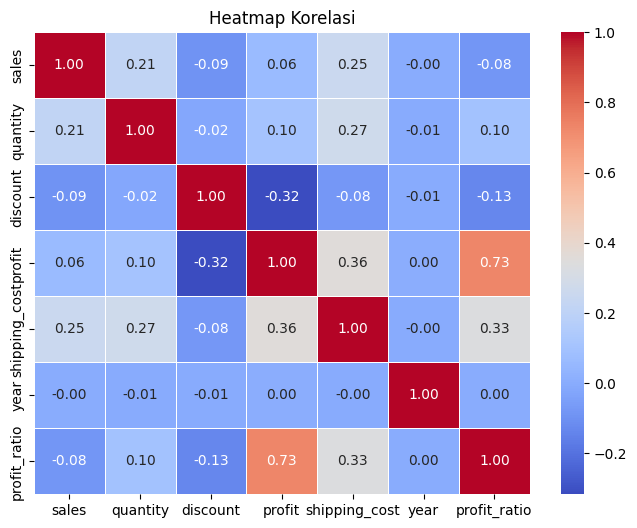

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Heatmap Korelasi')
plt.show()

## slicing data

In [33]:
# Buat kolom profit ratio (0-100%)
if 'profit_ratio' not in df.columns:
    df['profit_ratio'] = (df['profit'] / df['sales']) * 100

# Batasi supaya tetap dalam range 0-100
df['profit_ratio_capped'] = df['profit_ratio'].clip(lower=0, upper=100)

# Hitung rata-rata profit ratio per region
region_profit = (
    df.groupby('region')['profit_ratio_capped']
    .mean()
    .reset_index()
    .round(2)
)

# Urutkan dari terbesar ke terkecil dan ambil top 5
top5_region_profit = (
    region_profit
    .sort_values(by='profit_ratio_capped', ascending=False)
    .head(5)
    .reset_index(drop=True) 
)

# Tambahkan kolom ranking mulai dari 1
top5_region_profit.index = top5_region_profit.index + 1
top5_region_profit.index.name = "Rank"

print("Top 5 Region by Profit Ratio (0-100%):")
print(top5_region_profit)


Top 5 Region by Profit Ratio (0-100%):
            region  profit_ratio_capped
Rank                                   
1             West                29.61
2       North Asia                28.89
3     Central Asia                27.87
4             East                27.31
5           Canada                26.29


In [19]:
# Hitung jumlah transaksi per region dan urutkan
region_count = (
    df.groupby('region')
    .size()
    .reset_index(name='transaction_count')
    .sort_values(by='transaction_count', ascending=False)  
    .reset_index(drop=True)  
)

print(region_count)


            region  transaction_count
0          Central              11117
1            South               6645
2             EMEA               5029
3            North               4785
4           Africa               4587
5          Oceania               3487
6             West               3203
7   Southeast Asia               3129
8             East               2848
9       North Asia               2338
10    Central Asia               2048
11       Caribbean               1690
12          Canada                384


## average sales di region asia

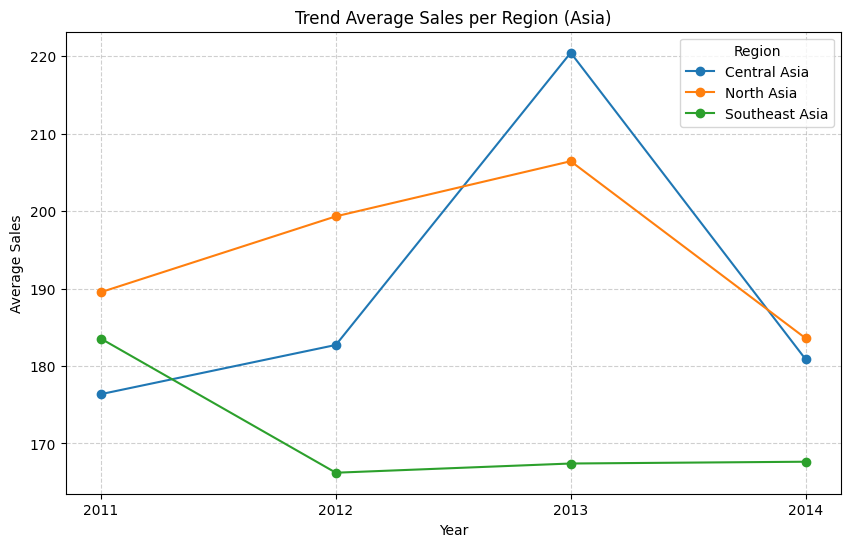

Tabel Rata-rata sales per Tahun per Region:
region  Central Asia  North Asia  Southeast Asia
year                                            
2011          176.37      189.54          183.53
2012          182.72      199.33          166.22
2013          220.46      206.45          167.41
2014          180.88      183.59          167.64


In [20]:
asia_regions = ['Central Asia', 'North Asia', 'Southeast Asia']

# buat df_asia (pakai .copy() agar perubahan aman)
df_asia = df[df['region'].isin(asia_regions)].copy()

# Hitung rata-rata sales per tahun per region
trend_sales = (
    df_asia.groupby(['year', 'region'])['sales']
    .mean()
    .reset_index()
)

# Pivot supaya rapi per tahun vs region, dan bulatkan 2 desimal
pivot_sales = trend_sales.pivot(index='year', columns='region', values='sales').round(2)

# Plot grafik line
plt.figure(figsize=(10,6))
for region in asia_regions:
    if region in pivot_sales.columns:
        plt.plot(pivot_sales.index, pivot_sales[region], marker='o', label=region)

plt.title("Trend Average Sales per Region (Asia)")
plt.xlabel("Year")
plt.ylabel("Average Sales")
plt.legend(title="Region")
plt.xticks(pivot_sales.index)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Print tabel hasil
print("Tabel Rata-rata sales per Tahun per Region:")
print(pivot_sales)

## hubungan average sales dengan profit ratio di region asia

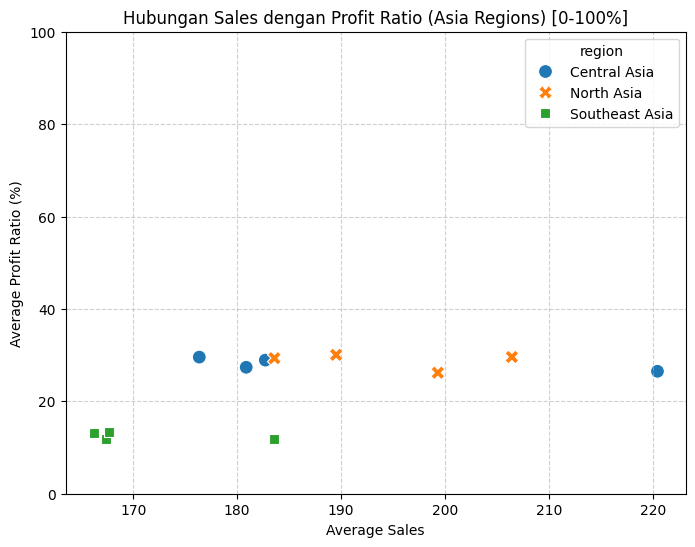

    year          region  avg_sales  avg_profit_ratio
0   2011    Central Asia     176.37             29.57
1   2011      North Asia     189.54             30.06
2   2011  Southeast Asia     183.53             11.82
3   2012    Central Asia     182.72             28.92
4   2012      North Asia     199.33             26.19
5   2012  Southeast Asia     166.22             13.23
6   2013    Central Asia     220.46             26.50
7   2013      North Asia     206.45             29.60
8   2013  Southeast Asia     167.41             11.86
9   2014    Central Asia     180.88             27.37
10  2014      North Asia     183.59             29.34
11  2014  Southeast Asia     167.64             13.41


In [21]:
# Bikin kolom profit ratio capped 0-100%
df_asia['profit_ratio_capped'] = df_asia['profit_ratio'].clip(lower=0, upper=100)

# Hitung rata-rata per tahun dan region untuk Sales & Profit Ratio
avg_sales_profit = (
    df_asia.groupby(['year', 'region'])
    .agg(avg_sales=('sales','mean'),
         avg_profit_ratio=('profit_ratio_capped','mean'))
    .reset_index()
)

# Scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=avg_sales_profit,
    x='avg_sales',
    y='avg_profit_ratio',
    hue='region',
    style='region',
    s=100
)

plt.title("Hubungan Sales dengan Profit Ratio (Asia Regions) [0-100%]")
plt.xlabel("Average Sales")
plt.ylabel("Average Profit Ratio (%)")
plt.ylim(0,100)   # batas Y 0–100%
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Print tabel hasil
print(avg_sales_profit.round(2))


## profit ratio per segment di region asia

           region      segment       sales      profit  profit_ratio
0    Central Asia     Consumer  196035.190  69196.0740     35.297782
1    Central Asia    Corporate  116991.679  41555.3380     35.519909
2    Central Asia  Home Office   76842.464  21728.7750     28.277041
3      North Asia     Consumer  216521.080  81181.6110     37.493629
4      North Asia    Corporate  140043.844  49815.7260     35.571521
5      North Asia  Home Office   97515.739  34581.0840     35.462054
6  Southeast Asia     Consumer  289813.112  10234.6954      3.531481
7  Southeast Asia    Corporate  150167.293   3707.1378      2.468672
8  Southeast Asia  Home Office   92543.861   3910.4958      4.225559


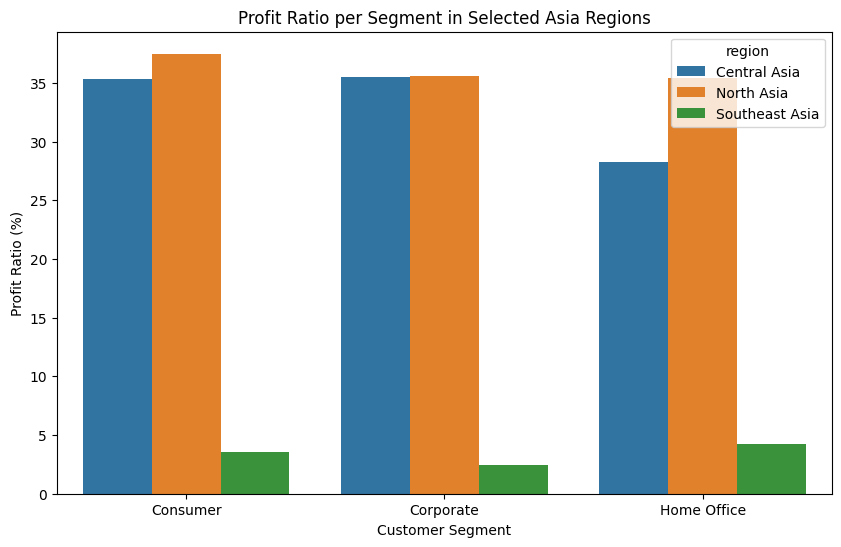

In [22]:
# Filter region tertentu
asia_data = df[df['region'].isin(['North Asia', 'Central Asia', 'Southeast Asia'])]

# Hitung total sales, total profit, rata-rata margin per segment & region
segment_margin = (
    asia_data.groupby(['region', 'segment']).agg({
        'sales': 'sum',
        'profit': 'sum'
    }).reset_index()
)

# Hitung margin berdasarkan total profit / total sales
segment_margin['profit_ratio'] = (segment_margin['profit'] / segment_margin['sales']) * 100

print(segment_margin)

# Visualisasi
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.barplot(data=segment_margin, x='segment', y='profit_ratio', hue='region')
plt.title('Profit Ratio per Segment in Selected Asia Regions')
plt.ylabel('Profit Ratio (%)')
plt.xlabel('Customer Segment')
plt.show()


In [23]:
df[df['region'] == 'Southeast Asia']['profit_ratio'].describe()

count      3129.000000
mean        378.614637
std        6506.023881
min     -113940.772164
25%         -31.540966
50%          -2.047500
75%          19.185366
max       49999.184339
Name: profit_ratio, dtype: float64

## average profit ratio per category di region asia

           region         category  profit_ratio_capped
0    Central Asia        Furniture                34.31
2    Central Asia       Technology                33.22
1    Central Asia  Office Supplies                22.89
5      North Asia       Technology                35.20
3      North Asia        Furniture                35.13
4      North Asia  Office Supplies                24.16
8  Southeast Asia       Technology                17.22
6  Southeast Asia        Furniture                16.00
7  Southeast Asia  Office Supplies                 9.70


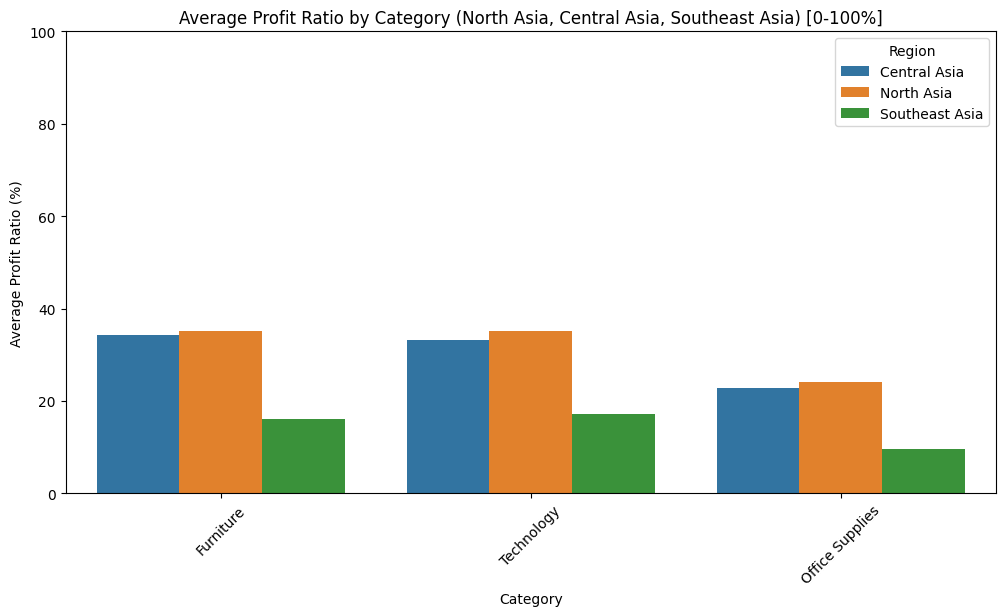

In [34]:
# Filter data untuk beberapa region
asia_data = df[df['region'].isin(['North Asia', 'Central Asia', 'Southeast Asia'])]

# Kelompokkan berdasarkan region & kategori, hitung rata-rata Profit Ratio (0-100%)
category_margin = (
    asia_data.groupby(['region', 'category'])['profit_ratio_capped']
    .mean()
    .reset_index()
    .round(2)
    .sort_values(by=['region', 'profit_ratio_capped'], ascending=[True, False])
)

print(category_margin)

# Plot per region (pisah-pisah grafik)
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(data=category_margin, x='category', y='profit_ratio_capped', hue='region')
plt.xlabel('Category')
plt.ylabel('Average Profit Ratio (%)')
plt.title('Average Profit Ratio by Category (North Asia, Central Asia, Southeast Asia) [0-100%]')
plt.xticks(rotation=45)
plt.legend(title='Region')
plt.ylim(0, 100)  # biar lebih jelas, paksa sumbu Y 0–100
plt.show()


In [25]:
# Filter Technology di Southeast Asia
Technology_sea = df[(df['region'] == 'Southeast Asia') & (df['category'] == 'Technology')].copy()

# Hitung profit margin
Technology_sea['profit_ratio'] = (Technology_sea['profit'] / Technology_sea['sales']) * 100

# Ambil transaksi dengan margin negatif
negative_margin = Technology_sea[Technology_sea['profit_ratio'] < 0]

# Lihat diskon & shipping cost juga
print("Contoh transaksi margin negatif:")
print(
    negative_margin[
        ['order_id', 'product_name', 'sales', 'profit', 'profit_ratio', 'discount', 'shipping_cost']
    ].head(10)   # tampilkan 10 contoh
)

# Analisis ringkas → rata-rata diskon & shipping cost utk transaksi rugi
summary_neg = negative_margin[['discount', 'shipping_cost']].mean()
print("\nRata-rata diskon & shipping cost (transaksi margin negatif):")
print(summary_neg)


Contoh transaksi margin negatif:
          order_id                          product_name    sales    profit  \
62   ID-2011-58670             Panasonic Phone, Wireless  445.000 -136.7100   
63   ID-2011-58670         Logitech Router, Programmable  274.000  -44.8380   
92   ID-2011-20814    Motorola Signal Booster, Full Size  240.000  -11.6028   
93   IN-2011-69366            Belkin Numeric Keypad, USB  177.000 -156.6792   
129  IN-2011-79761             Sharp Wireless Fax, Color  697.000 -343.0980   
234  IN-2011-45020                    Brother Ink, Laser  278.000 -106.0830   
625  ID-2011-47575  Nokia Signal Booster, with Caller ID  921.000 -172.1250   
626  ID-2011-47575       Brother Fax Machine, High-Speed    1.235 -456.1740   
631  ID-2011-47575               Cisco Headset, Cordless  137.000   -1.8450   
704  ID-2011-24454        Nokia Speaker Phone, Full Size   93.000   -7.4700   

     profit_ratio  discount  shipping_cost  
62     -30.721348      0.25          46.97  
63     

In [26]:
# Filter Furniture di Southeast Asia
furniture_sea = df[(df['region'] == 'Southeast Asia') & (df['category'] == 'Furniture')].copy()

# Hitung profit margin
furniture_sea['profit_ratio'] = (furniture_sea['profit'] / furniture_sea['sales']) * 100

# Ambil transaksi dengan margin negatif
negative_margin = furniture_sea[furniture_sea['profit_ratio'] < 0]

# Lihat diskon & shipping cost juga
print("Contoh transaksi margin negatif:")
print(
    negative_margin[
        ['order_id', 'product_name', 'sales', 'profit', 'profit_ratio', 'discount', 'shipping_cost']
    ].head(10)   # tampilkan 10 contoh
)

# Analisis ringkas → rata-rata diskon & shipping cost utk transaksi rugi
summary_neg = negative_margin[['discount', 'shipping_cost']].mean()
print("\nRata-rata diskon & shipping cost (transaksi margin negatif):")
print(summary_neg)


Contoh transaksi margin negatif:
           order_id                                  product_name    sales  \
11    IN-2011-65159     Chromcraft Round Table, Adjustable Height  211.000   
187   ID-2011-16453                        Tenex Door Stop, Black   99.000   
341   ID-2011-36011     Novimex Executive Leather Armchair, Black  334.000   
460   ID-2011-60882     Novimex Executive Leather Armchair, Black  334.000   
1294  ID-2011-66412  SAFCO Executive Leather Armchair, Adjustable  696.000   
1301  ID-2011-66412                            Tenex Clock, Black  226.000   
1578  IN-2011-76842        Harbour Creations Chairmat, Set of Two  108.000   
1655  ID-2011-10706                       Advantus Frame, Durable  730.000   
1769  ID-2011-50991             Harbour Creations Chairmat, Black  305.000   
2060  ID-2011-62142  SAFCO Executive Leather Armchair, Adjustable    1.016   

        profit  profit_ratio  discount  shipping_cost  
11    -70.3995    -33.364692      0.55          21.3

* Diskon 55%, profit margin -33%, rugi karena diskon terlalu besar, sales turun jauh di bawah modal.
* Diskon cuma 27%, masih wajar, kasus ini rugi bukan karena diskon, tapi shipping cost terlalu besar.
* Jadi, untuk Furniture di Southeast Asia, kerugian lebih sering karena kombinasi diskon besar + ongkos kirim mahal.

## profit ratio per year di region asia

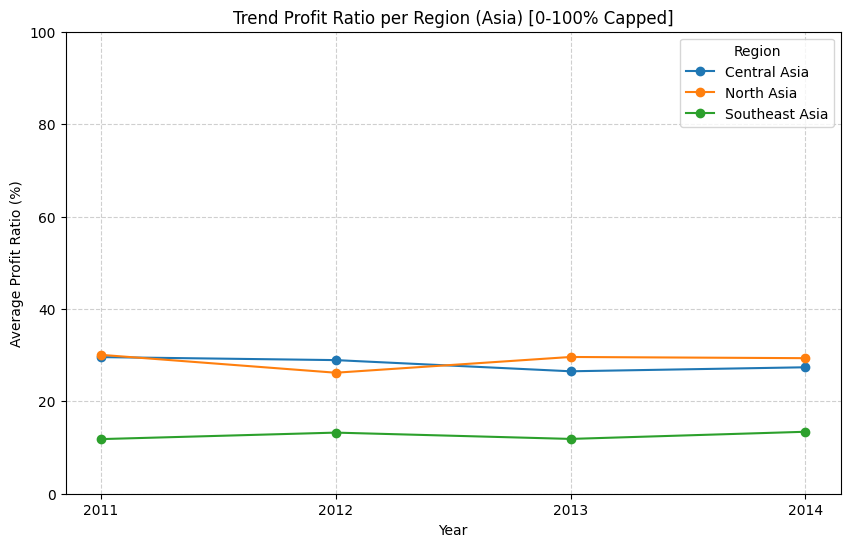

Tabel Profit Ratio (%) per Tahun:
region  Central Asia  North Asia  Southeast Asia
year                                            
2011           29.57       30.06           11.82
2012           28.92       26.19           13.23
2013           26.50       29.60           11.86
2014           27.37       29.34           13.41


In [27]:
# Filter hanya region Asia
asia_regions = ['Central Asia', 'North Asia', 'Southeast Asia']
df_asia = df[df['region'].isin(asia_regions)].copy()

# Batasi profit ratio di antara 0% sampai 100%
df_asia['profit_ratio_capped'] = df_asia['profit_ratio'].clip(lower=0, upper=100)

# Group by tahun & region
trend_margin_capped = (
    df_asia.groupby(['year', 'region'])['profit_ratio_capped']
    .mean()
    .reset_index()
)

# Pivot untuk rapi
pivot_margin_capped = trend_margin_capped.pivot(index='year', columns='region', values='profit_ratio_capped')

# Plot grafik
plt.figure(figsize=(10,6))
for region in asia_regions:
    if region in pivot_margin_capped.columns:
        plt.plot(pivot_margin_capped.index, pivot_margin_capped[region], marker='o', label=region)

plt.title("Trend Profit Ratio per Region (Asia) [0-100% Capped]")
plt.xlabel("Year")
plt.ylabel("Average Profit Ratio (%)")
plt.ylim(0, 100)
plt.legend(title="Region")
plt.xticks(pivot_margin_capped.index)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Print tabel hasil rata-rata
print("Tabel Profit Ratio (%) per Tahun:")
print(pivot_margin_capped.round(2))


## regression between year and profit ratio

In [28]:
import statsmodels.api as sm

# Uji tren per region
for region in asia_regions:
    df_region = df_asia[df_asia['region'] == region]
    
    # Gunakan profit ratio capped
    X = df_region['year']
    y = df_region['profit_ratio_capped']
    
    # Tambahkan konstanta untuk regresi (intercept)
    X = sm.add_constant(X)
    
    model = sm.OLS(y, X).fit()
    
    print(f"\n=== Region: {region} ===")
    print(model.summary())



=== Region: Central Asia ===
                             OLS Regression Results                            
Dep. Variable:     profit_ratio_capped   R-squared:                       0.001
Model:                             OLS   Adj. R-squared:                  0.001
Method:                  Least Squares   F-statistic:                     2.329
Date:                 Tue, 16 Sep 2025   Prob (F-statistic):              0.127
Time:                         08:04:47   Log-Likelihood:                -9634.6
No. Observations:                 2048   AIC:                         1.927e+04
Df Residuals:                     2046   BIC:                         1.928e+04
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       

In [29]:
central_asia_summary = (
    df_asia[df_asia['region'] == 'Central Asia']
    .groupby('year')
    .agg({
        'discount': 'mean',
        'sales': 'mean',
        'quantity': 'mean',
         'shipping_cost': 'mean'
    })
    .reset_index()
)

# Bulatkan semua kolom numerik ke 2 angka di belakang koma
central_asia_summary = central_asia_summary.round(2)

print(central_asia_summary)


   year  discount   sales  quantity  shipping_cost
0  2011      0.07  176.37      3.73          35.00
1  2012      0.06  182.72      3.84          41.79
2  2013      0.07  220.46      3.76          36.56
3  2014      0.07  180.88      3.75          38.19


In [30]:
central_asia_summary = (
    df_asia[df_asia['region'] == 'Southeast Asia']
    .groupby('year')
    .agg({
        'discount': 'mean',
        'sales': 'mean',
        'quantity': 'mean',
         'shipping_cost': 'mean'
    })
    .reset_index()
)

# Bulatkan semua kolom numerik ke 2 angka di belakang koma
central_asia_summary = central_asia_summary.round(2)

print(central_asia_summary)


   year  discount   sales  quantity  shipping_cost
0  2011      0.28  183.53      3.73          26.86
1  2012      0.26  166.22      3.70          30.66
2  2013      0.27  167.41      3.76          30.30
3  2014      0.27  167.64      3.87          30.84


In [31]:
region_summary = (
    df_asia[df_asia['region'].isin(['Central Asia', 'North Asia', 'Southeast Asia'])]
    .groupby(['year', 'region'])
    .agg({
        'discount': 'mean',
        'sales': 'mean',
        'quantity': 'mean',
        'shipping_cost': 'mean'
    })
    .reset_index()
)

# Bulatkan semua kolom numerik ke 2 angka di belakang koma
region_summary = region_summary.round(2)

print(region_summary)


    year          region  discount   sales  quantity  shipping_cost
0   2011    Central Asia      0.07  176.37      3.73          35.00
1   2011      North Asia      0.07  189.54      3.82          47.63
2   2011  Southeast Asia      0.28  183.53      3.73          26.86
3   2012    Central Asia      0.06  182.72      3.84          41.79
4   2012      North Asia      0.04  199.33      3.68          33.70
5   2012  Southeast Asia      0.26  166.22      3.70          30.66
6   2013    Central Asia      0.07  220.46      3.76          36.56
7   2013      North Asia      0.03  206.45      3.82          45.06
8   2013  Southeast Asia      0.27  167.41      3.76          30.30
9   2014    Central Asia      0.07  180.88      3.75          38.19
10  2014      North Asia      0.05  183.59      3.80          37.15
11  2014  Southeast Asia      0.27  167.64      3.87          30.84


In [32]:
# Hitung jumlah transaksi (order) per tahun per region
count_transactions = (
    df_asia.groupby(['year', 'region'])
    .size()  # hitung jumlah baris
    .reset_index(name='transaction_count')
)

# Pivot supaya rapi (tahun sebagai index, region sebagai kolom)
pivot_count = count_transactions.pivot(index='year', columns='region', values='transaction_count')

print("Jumlah Transaksi per Tahun per Region:")
print(pivot_count)


Jumlah Transaksi per Tahun per Region:
region  Central Asia  North Asia  Southeast Asia
year                                            
2011             358         466             572
2012             442         489             652
2013             511         629             793
2014             737         754            1112


### kesimpulan

* Central Asia & North Asia punya profit ratio lebih bagus (sekitar 30%) jika dibandingkan dengan Southeast Asia.
    - Nilai rata-rata sales di Southeast Asia tidak sebesar di kedua region asia lainnya.
    - Struktur dan kebijakan biaya berbeda (diskon, shipping cost).
    - Tingkat kompetisi pasar.
* Jika sales naik tanpa kontrol biaya ongkos kirim dan diskon maka profit ratio bisa turun.
* Jika sales naik dengan strategi pricing & efisiensi ongkos kirim yang baik maka profit ratio juga bisa ikut naik.